# HW4

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

## Problem 1

### 1

In [4]:
def entropy(p_n1:float) ->float:
    if p_n1 != 0 and p_n1 != 1:
        return p_n1*np.log2(1/p_n1) + (1-p_n1)*np.log2(1/(1-p_n1))
    else:
        return 0
H_y = entropy(0.6)
print(H_y)


0.9709505944546687


### 2

In [5]:
IG_x1 = H_y - 0.6*entropy(1/2) - 0.4*entropy(1/4)
IG_x2 = H_y - 0.5*entropy(0) - 0.5*entropy(4/5)
IG_x3 = H_y - 0.7*entropy(3/7) - 0.3*entropy(1/3)
IG_x4 = H_y - 0.7*entropy(2/7) - 0.3*entropy(2/3)
IG_x5 = H_y - 0.3*entropy(1/3) - 0.7*entropy(3/7)

my_dict = {f'IG_x{i}':eval(f'IG_x{i}') for i in range(1,6)}
my_list = sorted(my_dict.items(),key = lambda x:[-x[1],x[0]])
print(my_list)
print('We should split on feature x2 first since it has the highest information gain.')

[('IG_x2', 0.6099865470109875), ('IG_x4', 0.09127744624168027), ('IG_x1', 0.04643934467101557), ('IG_x3', 0.0058021490143459475), ('IG_x5', 0.0058021490143459475)]
We should split on feature x2 first since it has the highest information gain.


### 3

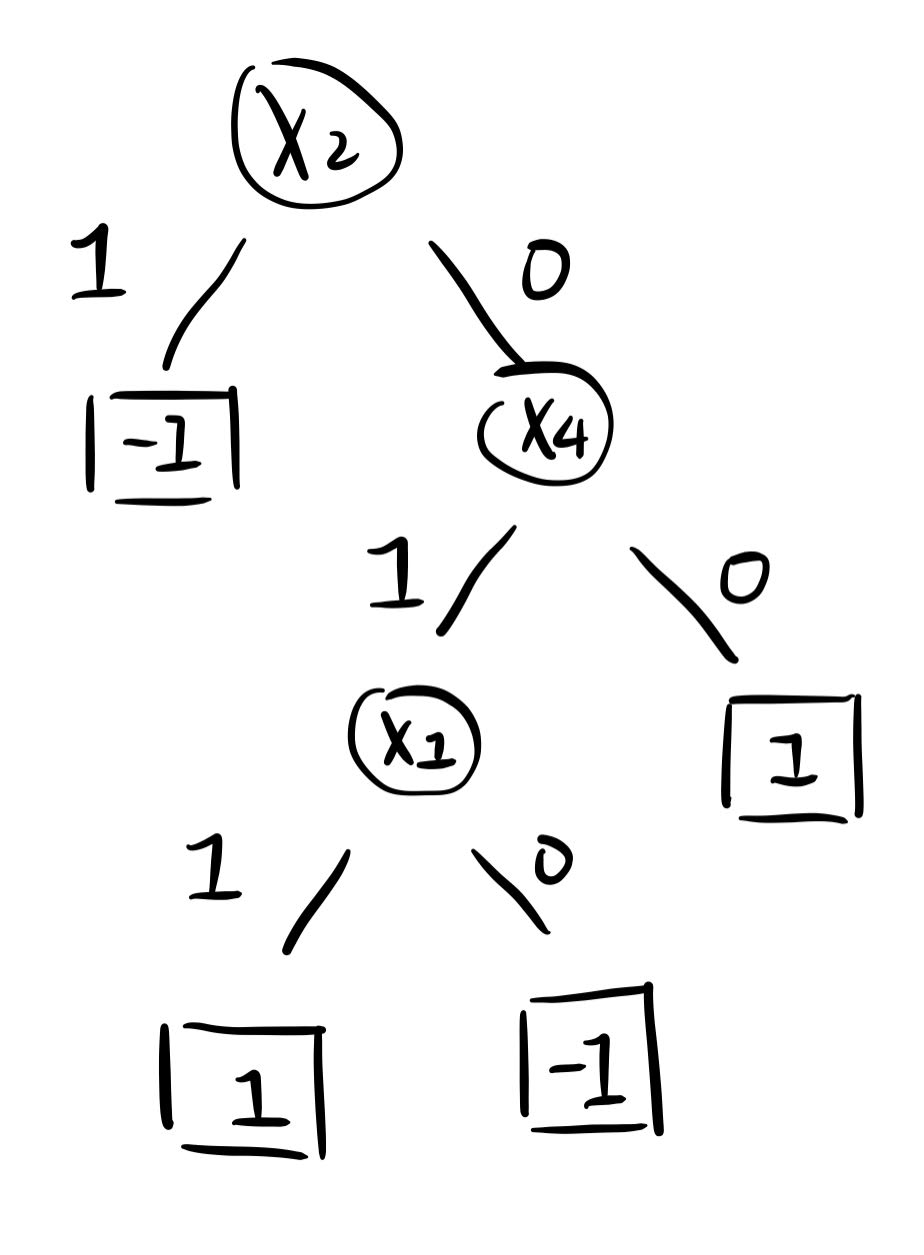

## Problem 2

In [6]:
X = np.genfromtxt('X_train.txt',delimiter = ',')
Y = np.genfromtxt('Y_train.txt',delimiter = ',')
X,Y = ml.shuffleData(X,Y)
X_test = np.genfromtxt('X_test.txt',delimiter = ',')
X = X[:,:41]


### 1

In [7]:
for i in range(5):
    print(f'X{i+1} Min:{min(X[:,i])}, Max:{max(X[:,i])}, Mean:{np.mean(X[:,i])}, Variance:{np.var(X[:,i])}')

X1 Min:0.0, Max:110285.0, Mean:1321.117413444699, Variance:6747189.595085322
X2 Min:0.0, Max:35.0, Mean:6.5916745251246125, Variance:34.70690630279573
X3 Min:0.0, Max:51536.0, Mean:1152.273237235619, Variance:5376518.288798102
X4 Min:0.0, Max:21768.0, Mean:234.8262548834703, Variance:260120.8305329767
X5 Min:0.0, Max:27210.0, Mean:289.75871211100633, Variance:406615.8651128233


### 2

In [8]:
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y,0.5)

In [9]:
learner = ml.dtree.treeClassify(Xtr,Ytr,maxDepth = 50)

In [10]:
Ytr_pred = learner.predict(Xtr)
Yva_pred = learner.predict(Xva)
print(f'Training error rate: {sum(Ytr_pred != Ytr)/len(Ytr)}')
print(f'Validation error rate: {sum(Yva_pred != Yva)/len(Yva)}')


Training error rate: 0.0
Validation error rate: 0.4209108057127459


### 3

In [11]:
train_error_list = []
validation_error_list = []
for i in range(16):
    learner = ml.dtree.treeClassify(Xtr,Ytr,maxDepth = i)
    Ytr_pred = learner.predict(Xtr)
    Yva_pred = learner.predict(Xva)
    train_error_list.append(sum(Ytr_pred != Ytr)/len(Ytr))
    validation_error_list.append(sum(Yva_pred != Yva)/len(Yva))


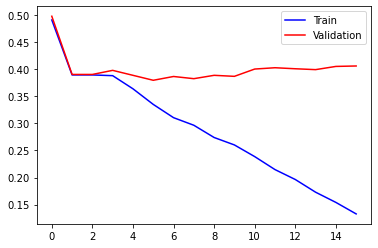

In [12]:
plt.plot(train_error_list,'b-',label = 'Train')
plt.plot(validation_error_list,'r-',label = 'Validation')
plt.legend()

Model with higer MaxDepth has higher complexity, and according to the plot when MaxDepth = 5, the model is the best.

### 4

In [13]:
train_error_list = []
validation_error_list = []
for i in range(14):
    learner = ml.dtree.treeClassify(Xtr,Ytr,maxDepth = 50, minParent = 2**i)
    Ytr_pred = learner.predict(Xtr)
    Yva_pred = learner.predict(Xva)
    train_error_list.append(sum(Ytr_pred != Ytr)/len(Ytr))
    validation_error_list.append(sum(Yva_pred != Yva)/len(Yva))

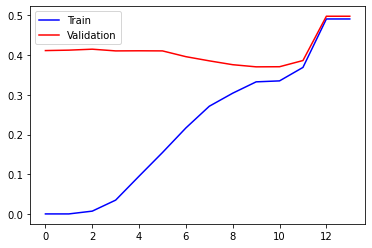

In [14]:
plt.plot(train_error_list,'b-',label = 'Train')
plt.plot(validation_error_list,'r-',label = 'Validation')
plt.legend()

The model with higer minParent has lower complexity, and according to the plot, the best choice for minParent is 512

### 5

In [105]:
train_error_list = []
validation_error_list = []
for i in range(1,14):
    learner = ml.dtree.treeClassify(Xtr,Ytr,maxDepth = 50, minLeaf = 2**i)
    Ytr_pred = learner.predict(Xtr)
    Yva_pred = learner.predict(Xva)
    train_error_list.append(sum(Ytr_pred != Ytr)/len(Ytr))
    validation_error_list.append(sum(Yva_pred != Yva)/len(Yva))

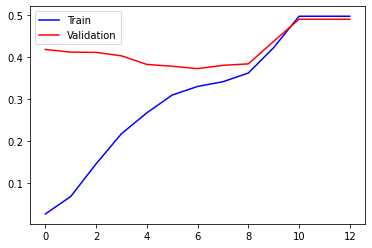

In [106]:
plt.plot(train_error_list,'b-',label = 'Train')
plt.plot(validation_error_list,'r-',label = 'Validation')
plt.legend()

The best choice for minLeaf is 256.

### 6

AUC score for MaxDepth = 50 is 0.5
AUC score for MaxDepth = 50 is 0.5


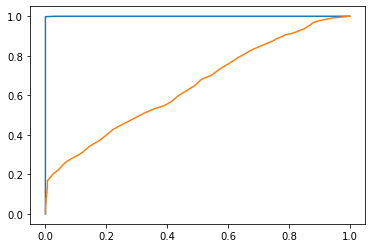

In [16]:
leaner = ml.dtree.treeClassify(Xtr,Ytr,maxDepth = 50)
ROC = leaner.roc(Xva,Yva)
ROC1 = leaner.roc(Xtr,Ytr)
plt.plot(ROC1[0],ROC1[1])
plt.plot(ROC[0],ROC[1])
print(f'AUC score for MaxDepth = 50 is {learner.auc(Xtr,Ytr)}')
print(f'AUC score for MaxDepth = 50 is {learner.auc(Xva,Yva)}')

AUC score for training set MaxDepth = 50 is 0.7156337452706389
AUC score for validation set MaxDepth = 50 and MinParent = 512 is 0.6951431441165741


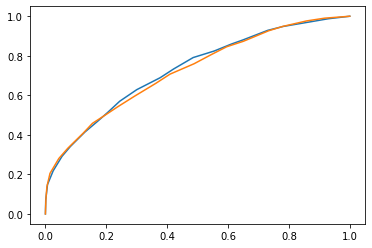

In [26]:
learner2 = ml.dtree.treeClassify(Xtr,Ytr,maxDepth = 50,minParent = 512,minLeaf = 256)
ROC = leaner.roc(Xva,Yva)
ROC1 = leaner.roc(Xtr,Ytr)
plt.plot(ROC1[0],ROC1[1])
plt.plot(ROC[0],ROC[1])
print(f'AUC score for training set MaxDepth = 50 is {learner2.auc(Xtr,Ytr)}')
print(f'AUC score for validation set MaxDepth = 50 and MinParent = 512 is {learner2.auc(Xva,Yva)}')

### 7

In [32]:
leaner = ml.dtree.treeClassify(X,Y,maxDepth = 50,minParent = 512,minLeaf = 256)
Xte = np.genfromtxt('X_test.txt',delimiter = ',')
Yte = np.vstack((np.arange(Xte.shape[0]),learner.predictSoft(Xte)[:,1])).T
np.savetxt('Y_submit.txt',Yte,'%d, %.2f',header = 'Id,Predicted',comments = '',delimiter = ',')

## Problem 3

### 1

In [21]:
nbags = 25
ensemble = []
Ytr_pred = np.zeros((np.size(Ytr),nbags))
Yva_pred = np.zeros((np.size(Yva),nbags))

for i in range(nbags):
    Xb,Yb = ml.bootstrapData(Xtr,Ytr)
    ensemble.append(ml.dtree.treeClassify(Xb,Yb,maxDepth = 15,minLeaf = 4,nFeatures = 50))
    Ytr_pred[:,i] = ensemble[i].predict(Xtr)
    Yva_pred[:,i] = ensemble[i].predict(Xva)

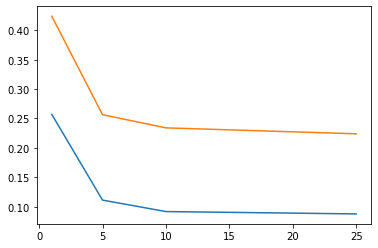

In [25]:
MSE_tr = []
MSE_va = []

for i in [1,5,10,25]:
    MSE_tr.append(np.mean((Ytr-np.mean(Ytr_pred[:,0:i],1))**2))
    MSE_va.append(np.mean((Yva-np.mean(Yva_pred[:,0:i],1))**2))
plt.plot([1,5,10,25],MSE_tr)
plt.plot([1,5,10,25],MSE_va)

### 2

In [44]:
nbags = 100
ensemble = []
Xte = np.genfromtxt('X_test.txt',delimiter = ',')
Yte_pred = np.zeros((1,np.size(Xte,0)))
for i in range(nbags):
    Xb,Yb = ml.bootstrapData(X,Y)
    ensemble.append(ml.dtree.treeClassify(Xb,Yb,maxDepth = 50,minLeaf = 256,minParent = 512, nFeatures = 50))
    Yte_pred += ensemble[i].predict(Xte)
Yte_pred /= nbags

Yte = np.vstack((np.arange(Xte.shape[0]),Yte_pred)).T

In [45]:
np.savetxt('Y_submit1.txt',Yte,'%d, %.2f',header = 'Id,Predicted',comments = '',delimiter = ',')

## Problem 4

I did all the work by myself. Zhengran Ji